https://github.com/microsoft/ML-For-Beginners/blob/main/5-Clustering/1-Visualize/README.md

| Method name                  | Use case                                                               |
| :--------------------------- | :--------------------------------------------------------------------- |
| K-Means                      | general purpose, inductive                                             |
| Affinity propagation         | many, uneven clusters, inductive                                       |
| Mean-shift                   | many, uneven clusters, inductive                                       |
| Spectral clustering          | few, even clusters, transductive                                       |
| Ward hierarchical clustering | many, constrained clusters, transductive                               |
| Agglomerative clustering     | many, constrained, non Euclidean distances, transductive               |
| DBSCAN                       | non-flat geometry, uneven clusters, transductive                       |
| OPTICS                       | non-flat geometry, uneven clusters with variable density, transductive |
| Gaussian mixtures            | flat geometry, inductive                                               |
| BIRCH                        | large dataset with outliers, inductive                                 |


 ### 'Transductive' vs. 'inductive'

Transductive inference is derived from observed training cases that map to specific test cases. Inductive inference is derived from training cases that map to general rules which are only then applied to test cases.

An example: Imagine you have a dataset that is only partially labelled. Some things are 'records', some 'cds', and some are blank. Your job is to provide labels for the blanks. If you choose an inductive approach, you'd train a model looking for 'records' and 'cds', and apply those labels to your unlabeled data. This approach will have trouble classifying things that are actually 'cassettes'. A transductive approach, on the other hand, handles this unknown data more effectively as it works to group similar items together and then applies a label to a group. In this case, clusters might reflect 'round musical things' and 'square musical things'.

### 'Non-flat' vs. 'flat' geometry

Derived from mathematical terminology, non-flat vs. flat geometry refers to the measure of distances between points by either 'flat' (Euclidean) or 'non-flat' (non-Euclidean) geometrical methods.

'Flat' in this context refers to Euclidean geometry (parts of which are taught as 'plane' geometry), and non-flat refers to non-Euclidean geometry. What does geometry have to do with machine learning? Well, as two fields that are rooted in mathematics, there must be a common way to measure distances between points in clusters, and that can be done in a 'flat' or 'non-flat' way, depending on the nature of the data. Euclidean distances are measured as the length of a line segment between two points. Non-Euclidean distances are measured along a curve. If your data, visualized, seems to not exist on a plane, you might need to use a specialized algorithm to handle it.



### 'Distances'

Clusters are defined by their distance matrix, e.g. the distances between points. This distance can be measured in a few ways. Euclidean clusters are defined by the average of the point values, and contain a 'centroid' or center point. Distances are thus measured by the distance to that centroid. Non-Euclidean distances refer to 'clustroids', the point closest to other points. Clustroids in turn can be defined in various ways.

### 'Constrained'

Constrained Clustering introduces 'semi-supervised' learning into this unsupervised method. The relationships between points are flagged as 'cannot link' or 'must-link' so some rules are forced on the dataset.

An example: If an algorithm is set free on a batch of unlabelled or semi-labelled data, the clusters it produces may be of poor quality. In the example above, the clusters might group 'round music things' and 'square music things' and 'triangular things' and 'cookies'. If given some constraints, or rules to follow ("the item must be made of plastic", "the item needs to be able to produce music") this can help 'constrain' the algorithm to make better choices.

### 'Density'

Data that is 'noisy' is considered to be 'dense'. The distances between points in each of its clusters may prove, on examination, to be more or less dense, or 'crowded' and thus this data needs to be analyzed with the appropriate clustering method. This article demonstrates the difference between using K-Means clustering vs. HDBSCAN algorithms to explore a noisy dataset with uneven cluster density.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/5-Clustering/data/nigerian-songs.csv')
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [9]:
# Double-check for null values, by calling isnull() and verifying the sum being 0:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [10]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [18]:
Counter(df['artist_top_genre'])

Counter({'alternative r&b': 7,
         'afropop': 90,
         'indie r&b': 4,
         'nigerian pop': 24,
         'afro r&b': 3,
         'afro dancehall': 328,
         'Missing': 53,
         'azonto': 1,
         'soft rock': 1,
         'hiplife': 1,
         'erotica': 1,
         'nigerian hip hop': 3,
         'highlife': 1,
         'azontobeats': 8,
         'south african house': 1,
         'bongo flava': 1,
         'afroswing': 1,
         'gqom': 1,
         'christian afrobeat': 1})

In [20]:
# alternate to
top = df['artist_top_genre'].value_counts()
top

afro dancehall         328
afropop                 90
Missing                 53
nigerian pop            24
azontobeats              8
alternative r&b          7
indie r&b                4
nigerian hip hop         3
afro r&b                 3
south african house      1
highlife                 1
soft rock                1
azonto                   1
hiplife                  1
christian afrobeat       1
gqom                     1
afroswing                1
bongo flava              1
erotica                  1
Name: artist_top_genre, dtype: int64

Text(0.5, 1.0, 'Top genres')

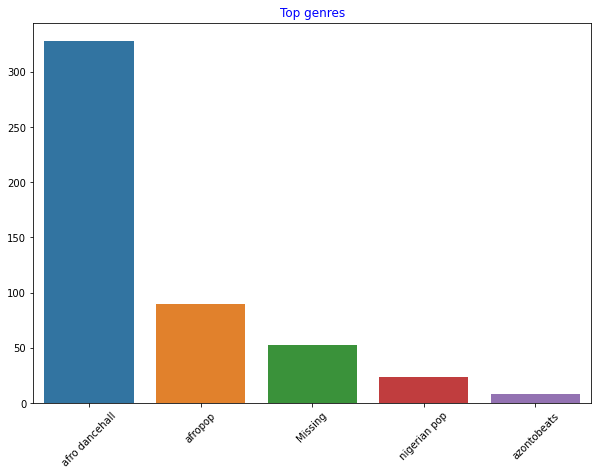

In [22]:
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Note, when the top genre is described as 'Missing', that means that Spotify did not classify it, so let's get rid of it.

Get rid of missing data by filtering it out

Text(0.5, 1.0, 'Top genres')

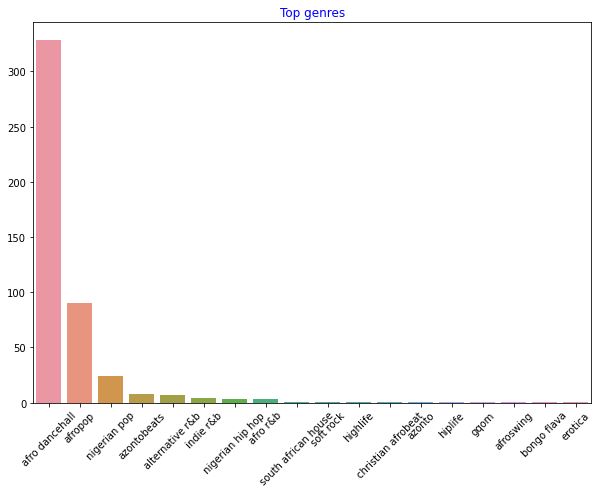

In [23]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [24]:
df

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


#### By far, the top three genres dominate this dataset. Let's concentrate on afro dancehall, afropop, and nigerian pop, additionally filter the dataset to remove anything with a 0 popularity value (meaning it was not classified with a popularity in the dataset and can be considered noise for our purposes):

Text(0.5, 1.0, 'Top genres')

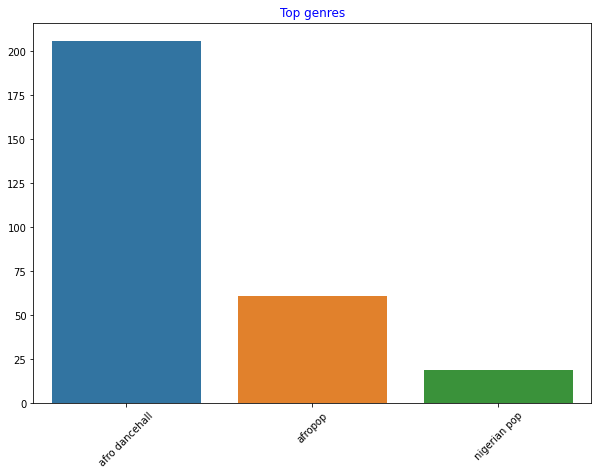

In [25]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [26]:
df

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Your Body Hot (feat. Attitude),Man of the Year,Skales,afro dancehall,2015,229906,20,0.838,0.0358,0.931,0.000000,0.0985,-3.723,0.1300,128.102,4
515,Shuperu - Remix,Shuperu (Remix),Orezi,afro dancehall,2015,215320,14,0.786,0.1950,0.806,0.000000,0.1610,-4.232,0.2540,124.068,4
519,Anything,Anything,Tekno,afropop,2015,208852,2,0.879,0.2240,0.916,0.000000,0.0877,-4.602,0.1570,126.031,4
522,Je Kan Mo,Je Kan Mo,Skales,afro dancehall,2015,195800,26,0.863,0.0366,0.896,0.000152,0.0504,-3.130,0.1010,128.029,4


#### The only strong correlation is between energy and loudness, which is not too surprising, given that loud music is usually pretty energetic. Otherwise, the correlations are relatively weak. It will be interesting to see what a clustering algorithm can make of this data.

<AxesSubplot:>

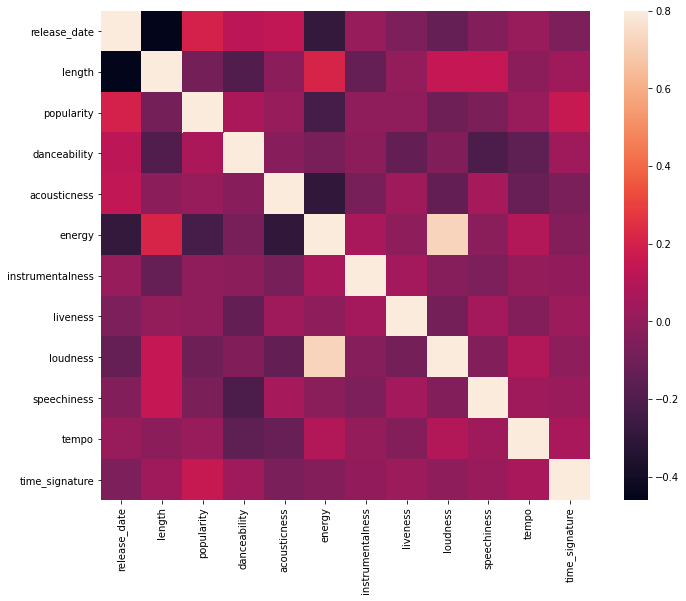

In [27]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# Data distribution

Examine our top three genres data distribution for popularity and danceability along a given x and y axis.

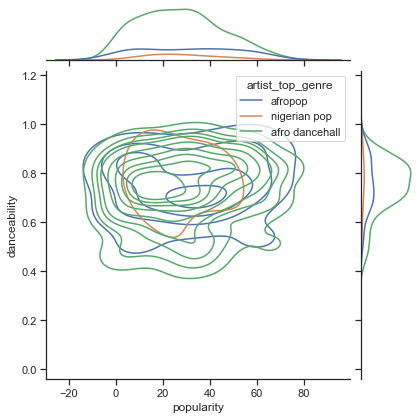

In [30]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

a scatter plot

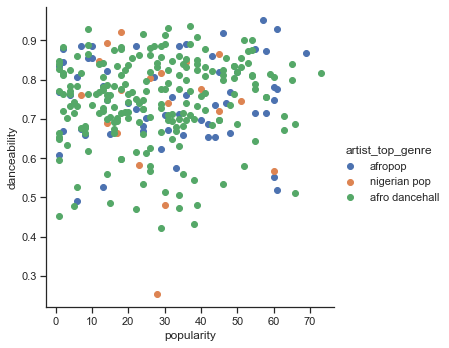

In [35]:
sns.FacetGrid(df, hue="artist_top_genre", height=5).map(plt.scatter, "popularity", "danceability").add_legend()
